                                                                                                      31st of July, 2022

### Problem Statement

Construct a prediction system that addresses systematicity as systematic and arbitrary exclusion of individuals based on algorithmic decisions represents a moral harm. The case of workforce hiring decisions-


### Recomendation

A process adjustment solution - 

A. mitigation of systematicity Pre-hiring decision

1.	Pre-interview selection & pre-hiring decision
    •	Use Principal Component Analysis to minimize/combine theoretically similar features (preferable).
    •	Identify outliers using scatter plot or data description
    •	Collect & analyze/reintegrate outliers {explain}

2.	Post-interview & pre-hiring decision
    •	Collect, analyze & explain false negatives and false positives based on confusion matrix using interview selection as target pre hiring decision (i.e. consider other stages in the hiring process besides ‘Hired’ as target/outcome variable).


B. Mitigation of systematicity post hiring decision to improve future hiring decision

3. Collect, analyze & explain false negatives and false positives based on confusion matrix against key performance indicators (KPIs). Also analyze the target ‘Hired’.


This approach reduces the possibility of moral harm imposed by systematicity. It also analyzes the impact of systematicity on company outcomes.


### Solution Approach/Methodology

1.	Load data
2.	Clean (if needed)
3.	Apply PCA (by similar feature groups)
4.	Apply PCA to all features (if A.1.b. above)
5.	Plot scatter diagram(s)
6.	Check for outliers
7.	Collect, analyze and reintegrate outliers
8.	Perform logistic regression
- Binary if “Hired” vs “Non-hired”
- Categorical if otherwise (i.e. data for other steps in the hiring process if provided)
9.	Plot Confusion Matrix
10.	Collect, analyze and explain false positives and false negatives given B above.


#### Load Packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

#### Load Data

In [2]:
## Load csv
filename = (r'file_path\data_aid.csv')

df_start = pd.read_csv(filename)

#### Prepare Data

In [3]:
df_start.head()

,candidate_id,application_status,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,...,candidate_skill_2_count,candidate_skill_3_count,candidate_skill_4_count,candidate_skill_5_count,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2
0,bgjikcrozdgkrtzigymnaylpypxxublc0,interview,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,...,7.0,2.0,8.0,12.0,0.0,9.0,4.0,6.0,0.600274,0.348715
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,interview,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,4.0,10.0,5.0,1.0,3.0,0.0,0.759273,0.972119
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,interview,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,...,4.0,7.0,4.0,NaN,2.0,NaN,6.0,1.0,0.664639,0.597499
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,hired,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,...,5.0,7.0,0.0,3.0,1.0,8.0,0.0,NaN,0.622446,0.569189
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,hired,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,...,6.0,NaN,8.0,NaN,1.0,1.0,10.0,4.0,0.493108,0.708251


In [4]:
df_start.tail()

,candidate_id,application_status,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,...,candidate_skill_2_count,candidate_skill_3_count,candidate_skill_4_count,candidate_skill_5_count,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2
49995,mwmzqfqpjcgkcwhlhycyifjhdlhxapyx49995,interview,2.0,cmqqxwebehtbvvbciowsgmpndwcpzdud49995,xmlakidjnethufyreybzrtvbuukgbxgg49995,1.0,NaN,1.0,NaN,0.0,...,NaN,6.0,4.0,3.0,0.0,2.0,5.0,6.0,0.634188,0.011739
49996,iyxtrctdgcvqdmjiprvkfoaflsqmpchl49996,pre-interview,4.0,ggswlbxzahzfusmszhpfjabvozlmfyof49996,dewpcsldydgkmupvefnxmrkxezoamhva49996,1.0,0.0,0.0,1.0,0.0,...,8.0,0.0,7.0,NaN,1.0,0.0,6.0,2.0,0.794797,0.260651
49997,grugsfwoaafwsvnxxwrouchvipiyivgr49997,pre-interview,2.9,ovfzligmlhifhhwchbyhrzfybmhuqges49997,xegrmanecxtngorgwmzeiimiglluqtox49997,NaN,0.0,0.0,NaN,0.0,...,7.0,1.0,8.0,7.0,6.0,0.0,2.0,1.0,0.294595,0.605005
49998,cwtgwibfwaawhgsgztunkfqttrphlgyu49998,pre-interview,2.9,lxmvhkqoipsgnpnibnsqsphmooywpcdi49998,jgeheqxgfahmjpdqxlfqgajvaywkchyh49998,NaN,1.0,0.0,NaN,1.0,...,1.0,3.0,4.0,6.0,2.0,5.0,0.0,1.0,0.943797,0.386801
49999,kifewbinvomrspttqkjbbqasqlglkysu49999,interview,2.6,raqafepdfnosncvobwzfnlbcukuaycxv49999,ghfxnxjbywnyantqpqvpgtezgqkozbtd49999,0.0,NaN,0.0,NaN,0.0,...,5.0,NaN,5.0,0.0,1.0,8.0,0.0,3.0,0.636503,0.125506


In [5]:
df_start.shape

(50000, 60)

In [6]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   candidate_id                       50000 non-null  object 
 1   application_status                 50000 non-null  object 
 2   number_of_employees_log            50000 non-null  float64
 3   occupation_id                      50000 non-null  object 
 4   company_id                         50000 non-null  object 
 5   occupation_skill_1_count           33374 non-null  float64
 6   occupation_skill_2_count           37227 non-null  float64
 7   occupation_skill_3_count           34724 non-null  float64
 8   occupation_skill_4_count           36279 non-null  float64
 9   occupation_skill_5_count           34998 non-null  float64
 10  occupation_skill_6_count           30468 non-null  float64
 11  occupation_skill_7_count           32920 non-null  flo

In [7]:
# Each company is unique; I will recommend analyzing each company uniquely.
df_start['company_id'].value_counts()
df_start['occupation_id'].value_counts()  

exvwhbxlejsfyqxnwjabksnntpwodfhr0        1
ahqphtwfpngdezrdxaddltvbcudpfoix33350    1
dkvckeqpblcirmpaapvkkpiaxbisfxrr33328    1
qonnaozgmzniqcgwpuldlpkccytfszkr33329    1
idqypgyuumenvtikcpiprttprzpvmtwf33330    1
                                        ..
tnhovgqysocnoffhqwmzqcvykpnfrsem16668    1
lahbvmitklaqmhlygpxgvwfsjbfyhimd16669    1
krrstmuxpqyvxdoyiksclcwrkxkcflwk16670    1
tcuynebyivsfezqepduowkttaxvwatti16671    1
raqafepdfnosncvobwzfnlbcukuaycxv49999    1
Name: occupation_id, Length: 50000, dtype: int64

In [8]:
df_start['application_status'].value_counts()

pre-interview    20350
hired            15122
interview        14528
Name: application_status, dtype: int64

In [9]:
scale_mapper = {'hired' : 1, 'interview' : 2, 'pre-interview' : 3} 
df_start['application_status_c'] = df_start['application_status'].replace(scale_mapper)

df_start.head()

,candidate_id,application_status,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,...,candidate_skill_3_count,candidate_skill_4_count,candidate_skill_5_count,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2,application_status_c
0,bgjikcrozdgkrtzigymnaylpypxxublc0,interview,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,...,2.0,8.0,12.0,0.0,9.0,4.0,6.0,0.600274,0.348715,2
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,interview,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,...,0.0,4.0,10.0,5.0,1.0,3.0,0.0,0.759273,0.972119,2
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,interview,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,...,7.0,4.0,NaN,2.0,NaN,6.0,1.0,0.664639,0.597499,2
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,hired,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,...,7.0,0.0,3.0,1.0,8.0,0.0,NaN,0.622446,0.569189,1
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,hired,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,...,NaN,8.0,NaN,1.0,1.0,10.0,4.0,0.493108,0.708251,1


In [10]:
df_start = pd.get_dummies(df_start, columns=['application_status'])
df_start.head()

,candidate_id,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,occupation_skill_6_count,...,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2,application_status_c,application_status_hired,application_status_interview,application_status_pre-interview
0,bgjikcrozdgkrtzigymnaylpypxxublc0,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,NaN,...,0.0,9.0,4.0,6.0,0.600274,0.348715,2,0,1,0
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,0.0,...,5.0,1.0,3.0,0.0,0.759273,0.972119,2,0,1,0
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,0.0,...,2.0,NaN,6.0,1.0,0.664639,0.597499,2,0,1,0
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,NaN,...,1.0,8.0,0.0,NaN,0.622446,0.569189,1,1,0,0
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,NaN,...,1.0,1.0,10.0,4.0,0.493108,0.708251,1,1,0,0


In [11]:
df_start['gender'].value_counts() 

Male      19354
Female    17909
Other     12737
Name: gender, dtype: int64

In [12]:
df_start = pd.get_dummies(df_start, columns=['gender'])
df_start.head()

,candidate_id,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,occupation_skill_6_count,...,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2,application_status_c,application_status_hired,application_status_interview,application_status_pre-interview,gender_Female,gender_Male,gender_Other
0,bgjikcrozdgkrtzigymnaylpypxxublc0,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,NaN,...,6.0,0.600274,0.348715,2,0,1,0,0,1,0
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.759273,0.972119,2,0,1,0,0,0,1
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,0.0,...,1.0,0.664639,0.597499,2,0,1,0,0,1,0
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,0.622446,0.569189,1,1,0,0,1,0,0
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,NaN,...,4.0,0.493108,0.708251,1,1,0,0,0,1,0


In [13]:
df_start['ethnicity'].value_counts()

White English / Welsh / Scottish / Northern Irish / British    6516
Black African                                                  2821
Black / African / Caribbean any other background               2366
Mixed ethnic any other background                              2255
Asian Bangladeshi                                              2033
Any other ethnic group not listed                              2010
Hispanic / Latinx                                              1988
Black or African American                                      1985
Mixed ethnic White and Black Caribbean                         1924
Mixed ethnic White and Asian                                   1918
Asian Indian                                                   1882
Asian Pakistani                                                1819
White Irish                                                    1759
White                                                          1629
Black Caribbean                                 

In [14]:
df_start = pd.get_dummies(df_start, columns=['ethnicity'])
df_start.head()

,candidate_id,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,occupation_skill_6_count,...,ethnicity_Mixed ethnic White and Black African,ethnicity_Mixed ethnic White and Black Caribbean,ethnicity_Mixed ethnic any other background,ethnicity_Other,ethnicity_Rather not say,ethnicity_White,ethnicity_White English / Welsh / Scottish / Northern Irish / British,ethnicity_White Gypsy / Irish Traveller,ethnicity_White Irish,ethnicity_White any other background
0,bgjikcrozdgkrtzigymnaylpypxxublc0,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [15]:
df = df_start.loc[:, ['application_status_c', 'number_of_employees_log', 'candidate_attribute_1', 'candidate_attribute_2',  
          'age', 'number_years_feature_1', 'number_years_feature_2', 'number_years_feature_3',
            'number_years_feature_4', 'number_years_feature_5', 'candidate_demographic_variable_1', 
            'candidate_demographic_variable_2', 'candidate_demographic_variable_3', 'candidate_interest_1', 
            'candidate_interest_2', 'candidate_skill_1_count', 'candidate_skill_2_count', 'candidate_relative_test_1',
            'candidate_relative_test_2', 'application_status_hired', 'application_status_interview',
            'application_status_pre-interview','gender_Female', 'gender_Male', 'gender_Other']]

In [16]:
df.isnull().sum()

application_status_c                    0
number_of_employees_log                 0
candidate_attribute_1               11063
candidate_attribute_2                2247
age                                  1607
number_years_feature_1               2260
number_years_feature_2               2040
number_years_feature_3               1878
number_years_feature_4               1183
number_years_feature_5               1827
candidate_demographic_variable_1     9581
candidate_demographic_variable_2    15380
candidate_demographic_variable_3    14383
candidate_interest_1                 3992
candidate_interest_2                16850
candidate_skill_1_count              4770
candidate_skill_2_count              4688
candidate_relative_test_1            3914
candidate_relative_test_2            3427
application_status_hired                0
application_status_interview            0
application_status_pre-interview        0
gender_Female                           0
gender_Male                       

In [17]:
#df = df.dropna (how = 'any') # there are other preferred methods 
df = df.fillna(method = 'bfill') # not recommended for micro level data used here to preserve data

In [18]:
df.shape

(50000, 25)

In [19]:
df.isnull().sum()

application_status_c                0
number_of_employees_log             0
candidate_attribute_1               1
candidate_attribute_2               0
age                                 0
number_years_feature_1              0
number_years_feature_2              0
number_years_feature_3              0
number_years_feature_4              0
number_years_feature_5              0
candidate_demographic_variable_1    1
candidate_demographic_variable_2    0
candidate_demographic_variable_3    0
candidate_interest_1                1
candidate_interest_2                2
candidate_skill_1_count             0
candidate_skill_2_count             0
candidate_relative_test_1           0
candidate_relative_test_2           0
application_status_hired            0
application_status_interview        0
application_status_pre-interview    0
gender_Female                       0
gender_Male                         0
gender_Other                        0
dtype: int64

In [20]:
df = df.dropna (how = 'any')

In [21]:
df.isnull().sum()

application_status_c                0
number_of_employees_log             0
candidate_attribute_1               0
candidate_attribute_2               0
age                                 0
number_years_feature_1              0
number_years_feature_2              0
number_years_feature_3              0
number_years_feature_4              0
number_years_feature_5              0
candidate_demographic_variable_1    0
candidate_demographic_variable_2    0
candidate_demographic_variable_3    0
candidate_interest_1                0
candidate_interest_2                0
candidate_skill_1_count             0
candidate_skill_2_count             0
candidate_relative_test_1           0
candidate_relative_test_2           0
application_status_hired            0
application_status_interview        0
application_status_pre-interview    0
gender_Female                       0
gender_Male                         0
gender_Other                        0
dtype: int64

In [22]:
df.describe()

,application_status_c,number_of_employees_log,candidate_attribute_1,candidate_attribute_2,age,number_years_feature_1,number_years_feature_2,number_years_feature_3,number_years_feature_4,number_years_feature_5,...,candidate_skill_1_count,candidate_skill_2_count,candidate_relative_test_1,candidate_relative_test_2,application_status_hired,application_status_interview,application_status_pre-interview,gender_Female,gender_Male,gender_Other
count,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,...,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000
mean,2.104544,2.920907,0.372115,1.164878,30.111864,8.842434,5.392127,6.131381,2.636022,5.700996,...,5.021081,3.565023,0.516267,0.482148,0.302452,0.290552,0.406996,0.358174,0.387075,0.254750
std,0.835783,0.956351,0.483374,0.773028,11.175085,5.811526,3.809827,4.070964,3.176243,4.011638,...,3.405744,2.631414,0.287154,0.284407,0.459325,0.454021,0.491279,0.479469,0.487086,0.435725
min,1.000000,1.000000,0.000000,0.000027,16.006592,0.000251,0.000025,0.000009,0.000002,0.000071,...,0.000000,0.000000,0.000039,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.483849,20.350396,3.518034,1.685179,2.421326,0.237852,1.860249,...,2.000000,1.000000,0.267944,0.243915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.900000,0.000000,1.115424,26.775660,8.862729,5.213342,5.992256,0.474562,5.427982,...,5.000000,3.000000,0.525825,0.470560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,1.000000,1.835754,38.319401,13.881703,8.757232,9.692011,5.580916,9.358236,...,8.000000,6.000000,0.765209,0.718022,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,4.000000,1.000000,2.540608,55.654664,18.922803,12.180511,13.335406,9.750100,12.919689,...,11.000000,8.000000,0.999975,0.999985,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
from sklearn.decomposition import PCA

In [24]:
features = ['number_of_employees_log', 'candidate_attribute_1', 'candidate_attribute_2',  
          'age', 'number_years_feature_1', 'number_years_feature_2', 'number_years_feature_3',
            'number_years_feature_4', 'number_years_feature_5', 'candidate_demographic_variable_1', 
            'candidate_demographic_variable_2', 'candidate_demographic_variable_3', 'candidate_interest_1', 
            'candidate_interest_2', 'candidate_skill_1_count', 'candidate_skill_2_count', 'candidate_relative_test_1',
            'candidate_relative_test_2', 'gender_Female', 'gender_Male', 'gender_Other']

In [25]:
x = df.loc[:, features].values
y = df.loc[:,['application_status_c']].values

In [26]:
x = StandardScaler().fit_transform(x)

In [27]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [28]:
pca_df = pd.concat([principalDf, df[['application_status_c']]], axis = 1)

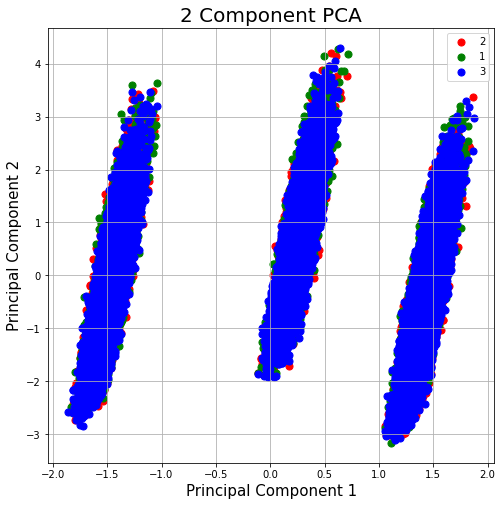

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8));
targets = df.loc[:, 'application_status_c'].unique()
colors = ['r', 'g', 'b']

for application_status_c, color in zip(targets,colors):
    indicesToKeep = pca_df['application_status_c'] == application_status_c
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)    
ax.legend(targets)
ax.grid()

#### Model

In [30]:
x = df.loc[:, features].values
y = df.loc[:,['application_status_c']].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [33]:
pca = PCA(.98)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Logistic Regression
pca_clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)
pca_clf.fit(X_train_pca, y_train)

print('Number of dimensions after PCA: ' + str(pca.n_components_))
print('Classification accuracy: ' + str(pca_clf.score(X_test_pca, y_test)))

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of dimensions after PCA: 8
Classification accuracy: 0.40304


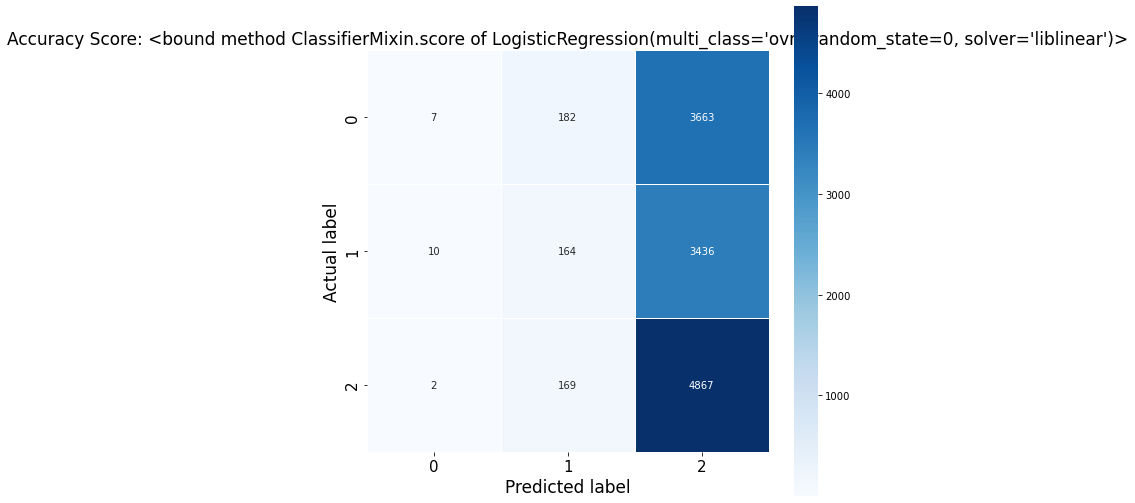

In [34]:
cm = metrics.confusion_matrix(y_test, pca_clf.predict(X_test_pca))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(pca_clf.score), size = 17);
plt.tick_params(labelsize= 15)

## Thoughts on Possible Next Steps

1. Conduct separate analysis/modeling for 'hired' & 'interview'
2. Apply PCA on all features grouped by similarity
3. Account for ethnicity
4. Minimize false negatives and false positives (consider alternative models and methods. Measure improvement using ROC curve)
5. Account for 'fit' as measured by reviewer 
6. Explore game theory implications for bias in winner take all game with multiple participants


## Concluding Remarks

I am grateful for the opportunity to have worked on this assignment. Thank you!